In [32]:
# import common
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "../data/"

In [33]:
house = pd.read_csv(data_path + 'houseprice.csv');house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


### 1.	5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 특히 판매가격과 세금의 산점도를 보면 특이값 3개가 나타난다. 이들 값의 특성은 무엇인가?

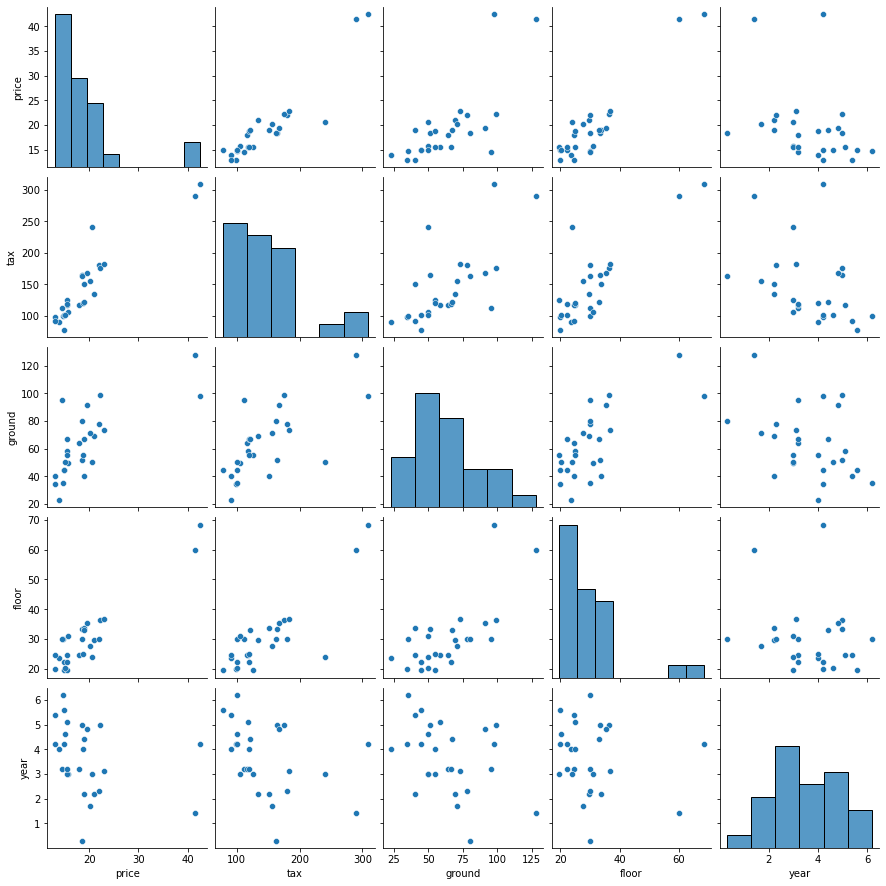

In [34]:
sns.pairplot(house)
plt.show()

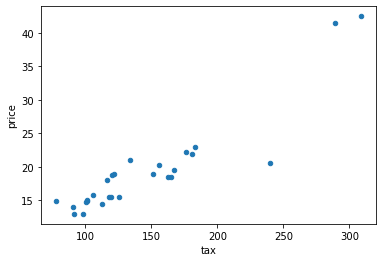

In [35]:
house.plot(x='tax',y='price',kind='scatter')
plt.show()

In [36]:
house.loc[house.tax>200]

,price,tax,ground,floor,year
8,42.45,308.404,98.0,68.4,4.2
9,41.45,289.196,128.0,60.0,1.4
26,20.50,240.000,50.0,24.0,3.0


In [37]:
house.describe()

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


### 2.	주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

In [38]:
model = smf.ols('price~tax+ground+floor+year',house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.82e-12
Time:                        09:24:46   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.	결정계수는 얼마인가? 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가? 

In [39]:
model.rsquared

0.9312715052594146

### 4. 세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

In [40]:
pred = model.get_prediction(exog = dict(tax=150, ground=50, floor=30, year=3))
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.41629,0.595931,18.180405,20.652175,15.01113,23.82145


### 5. 회귀진단을 위한 그래프들과 잔차 대 설명변수들의 산점도를 그리고 설명하여라.

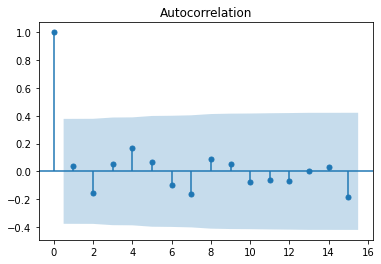

In [41]:
sm.graphics.tsa.plot_acf(model.resid)
plt.show()

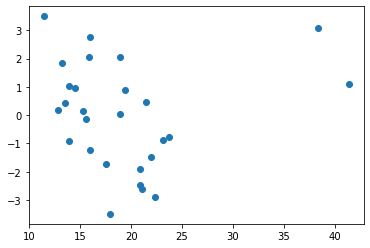

In [42]:
plt.scatter(model.fittedvalues, model.resid)
plt.show()

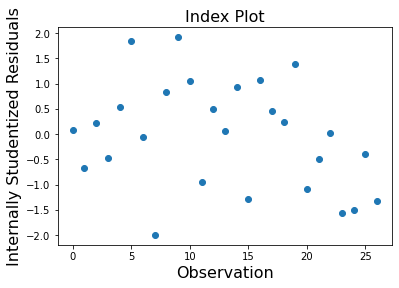

In [43]:
inf = OLSInfluence(model)
inf.plot_index('resid', threshold=3)
plt.show()

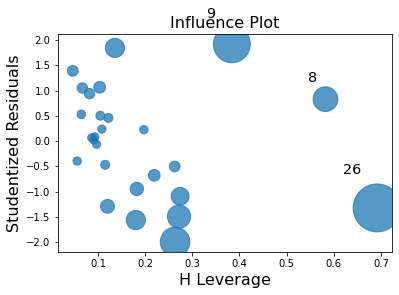

In [13]:
inf.plot_influence()
plt.show()

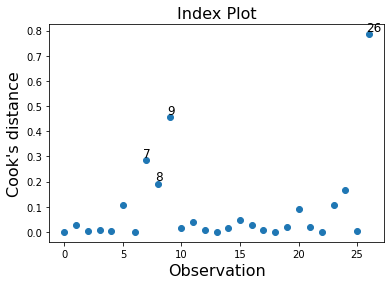

In [14]:
inf.plot_index('cook', threshold=4/(model.nobs-4-1))
plt.show()

In [15]:
idx = [7,8,9,26]
house.iloc[idx,:]

,price,tax,ground,floor,year
7,14.45,112.186,95.2,30.02,3.2
8,42.45,308.404,98.0,68.40,4.2
9,41.45,289.196,128.0,60.00,1.4
26,20.50,240.000,50.0,24.00,3.0


### 6. 판매가격과 세금의 산점도에서 관측된 우측 상단의 특이값 2개를 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가?

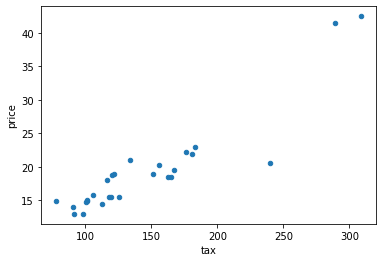

In [16]:
house.plot(x='tax',y='price',kind='scatter')
plt.show()

In [24]:
house.loc[house.tax>250]

,price,tax,ground,floor,year
8,42.45,308.404,98.0,68.4,4.2
9,41.45,289.196,128.0,60.0,1.4


In [22]:
house1 = house.loc[house.tax<250]

In [23]:
model = smf.ols('price~tax+ground+floor+year',house1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     16.85
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.43e-06
Time:                        22:35:53   Log-Likelihood:                -44.055
No. Observations:                  25   AIC:                             98.11
Df Residuals:                      20   BIC:                             104.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7702      2.166      3.125      0.005       2.251      11.289
tax            0.0448      0.011      4.102      0.001       0.022       0.068
ground         0.0203      0.021      0.980      0.339      -0.023       0.063
floor          0.1563      0.076      2.054      0.053      -0.002       0.315
year          -0.2127      0.263     -0.809      0.428      -0.761       0.336
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.236
Skew:                          -0.040   Prob(JB):                        0.889
Kurtosis:                       2.531   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 우측 상단의 특이값은 인덱스가 각각 8,9인 영향점에 해당하며, 영향점을 제거하면 회귀분석에 영향을 줄 것으로 예상한다. 
- 특이값 제거 후 결정계수가 0.77로 낮아지므로 회귀분석 결과에 영향을 준다.

In [25]:
model = smf.ols('price~tax+ground+floor+year',house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.82e-12
Time:                        22:38:21   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 선형회귀모형의 가정
### y와 x는 선형관계이다
### 오차항은 서로 독립이다.
### 오차항 분산은 동일하다.
### 오차항은 정규분포를 따른다.

# 모형의 선형성

### 모형이 선형성을 만족하지 않는다.

- 예측값(fitted)과 잔차(residual)를 비교
- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다.
- 빨간 실선은 잔차의 추세를 나타낸다.
- 빨간 실선이 점선에서 크게 벗어난다면, 예측값에 따라 잔차가 크게 달라지는 것으로 선형성이 없다는 것

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


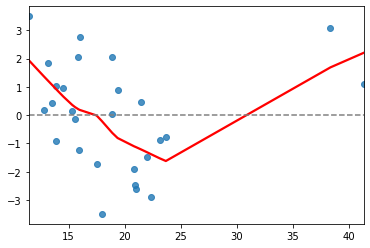

In [31]:
fitted = model.predict(house)
residual = house['price'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color = 'grey')

# 잔차의 정규성

### Q-Q plot에서 점들이 점선을 따라 배치되어있으며, shapiro-test결과 0.8879>0.05이므로 오차항은 정규성을 따른다.

- 잔차가 정규분포를 따른다는 가정
- Q-Q plot으로 확인
- 잔차가 정규분포를 띄면 Q-Q plot에서 점들이 점선을 따라 배치

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


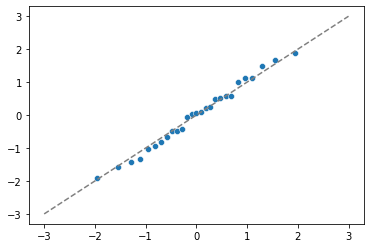

In [27]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x,y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

In [28]:
scipy.stats.shapiro(residual) 
# 오차의 정규성 검정에서 p-value값이 0.8879로 0.05보다 크므로 정규성을 따른다.

ShapiroResult(statistic=0.98117595911026, pvalue=0.8878955245018005)

# 잔차의 등분산성

### 왼쪽영역에 점이 몰려있고, 왼쪽과 오른쪽 모습이 서로 달라 등분산성을 만족하지 않는다.

- 회귀모형을 통해 예측한 값이 어떻든지 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 예측값(x축)에 따라서 잔차가 어떻게 달라지는 지 보여줌
- 빨간색 실선이 수평에 가까울 수록 등분산성이 있는 것

<AxesSubplot:>

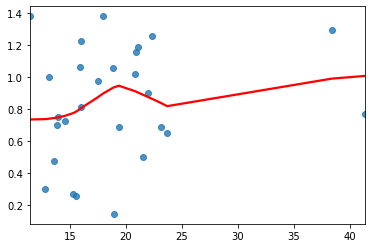

In [30]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws = {'color': 'red'})

# 잔차의 독립성

### 자기상관 그래프에서 0에 가까운 값인 파란 박스권 내에 위치하여 상관성이 존재하지 않으며, durbin-watson 검정결과 자기상관이 없는 2에 가까운 1.9003을 가지기 때문에 자기상관이 없는 독립성을 갖는다.

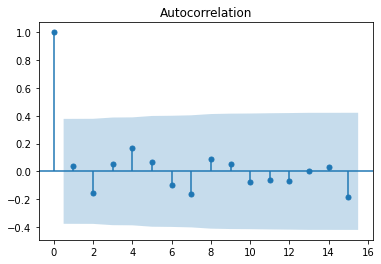

In [32]:
sm.graphics.tsa.plot_acf(model.resid)
plt.show()

In [33]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residual)

1.900346298240356

# 극단값

In [44]:
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

26    0.785459
9     0.457034
7     0.284292
8     0.192256
24    0.166421
dtype: float64

# 변수선택 모델 릿지,라소 적용

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "C:/Users/msi/Desktop/자료/2021년 1학기/다변량통계분석/data/"
boston = pd.read_csv(data_path + "Boston.csv")

In [4]:
formula = 'medv~'+'+'.join(boston.columns[:-1]);formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [5]:
import patsy
y, X = patsy.dmatrices(formula, data = boston, return_type='dataframe')

In [6]:
import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic, 
            "BIC": regr.bic, "adj_r2": regr.rsquared_adj,
           "r2":regr.rsquared }

def getBest(k, best = "AIC"):
    
    tic = time.time()   
    results = []
    
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else: 
        best_model = models.loc[models[best].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [7]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

for i in range(1,X.shape[1]-1):
    models_best.loc[i] = getBest(i, best = "AIC")

Processed 13 models on 1 predictors in 0.054826974868774414 seconds.
Processed 78 models on 2 predictors in 0.09976506233215332 seconds.
Processed 286 models on 3 predictors in 0.31917548179626465 seconds.
Processed 715 models on 4 predictors in 0.9046142101287842 seconds.
Processed 1287 models on 5 predictors in 1.602736473083496 seconds.
Processed 1716 models on 6 predictors in 2.1562247276306152 seconds.
Processed 1716 models on 7 predictors in 2.1123852729797363 seconds.
Processed 1287 models on 8 predictors in 1.8731579780578613 seconds.
Processed 715 models on 9 predictors in 0.9290115833282471 seconds.
Processed 286 models on 10 predictors in 0.35405492782592773 seconds.
Processed 78 models on 11 predictors in 0.09873437881469727 seconds.
Processed 13 models on 12 predictors in 0.01795196533203125 seconds.


In [8]:
models_best

,model,RSS,AIC,BIC,adj_r2,r2
1,<statsmodels.regression.linear_model.Regressio...,19472.381418,3286.974957,3295.428030,0.543242,0.544146
2,<statsmodels.regression.linear_model.Regressio...,15439.309201,3171.542314,3184.221924,0.637124,0.638562
3,<statsmodels.regression.linear_model.Regressio...,13727.985314,3114.097267,3131.003414,0.676704,0.678624
4,<statsmodels.regression.linear_model.Regressio...,13228.907703,3097.359045,3118.491728,0.687835,0.690308
5,<statsmodels.regression.linear_model.Regressio...,12469.344151,3069.438633,3094.797853,0.705170,0.708089
6,<statsmodels.regression.linear_model.Regressio...,12141.072736,3057.939050,3087.524806,0.712357,0.715774
7,<statsmodels.regression.linear_model.Regressio...,11868.235607,3048.438383,3082.250676,0.718256,0.722161
8,<statsmodels.regression.linear_model.Regressio...,11678.299470,3042.274993,3080.313823,0.722207,0.726608
9,<statsmodels.regression.linear_model.Regressio...,11526.122446,3037.638096,3079.903463,0.725274,0.730170
10,<statsmodels.regression.linear_model.Regressio...,11308.577606,3029.996540,3076.488444,0.729915,0.735263


In [9]:
models_best['AIC'].argmin() # 인덱스가 10번째이므로 값은 11번째

10

In [10]:
models_best['BIC'].argmin() # 인덱스가 10번째이므로 값은 11번째

10

In [11]:
models_best['adj_r2'].argmax() # 인덱스가 10번째이므로 값은 11번째

10

In [12]:
model_final = models_best.iloc[models_best['BIC'].argmin(),0]
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          5.54e-137
Time:                        09:10:47   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ridge

In [23]:
import patsy
y,X = patsy.dmatrices(formula,boston, return_type='matrix')

In [24]:
from sklearn.linear_model import Ridge

ridge_alpha=1
ridge_reg = Ridge() # ridge_reg = Ridge(alpha = ridge_alpha)
ridge_reg.fit(X,y)

Ridge()

In [25]:
y_pred = ridge_reg.predict(X)

In [26]:
ridge_reg.coef_

array([[ 0.00000000e+00, -1.04595278e-01,  4.74432243e-02,
        -8.80467889e-03,  2.55239322e+00, -1.07770146e+01,
         3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
         2.90141589e-01, -1.29116463e-02, -8.76074394e-01,
         9.67327945e-03, -5.33343225e-01]])

#### Lasso

In [29]:
import patsy
y,X = patsy.dmatrices(formula,boston, return_type='matrix')

from sklearn.linear_model import Lasso

lasso_alpha = 0.1
lasso_reg = Lasso(alpha = 0.01) # lasso_reg = Lasso(alpha = lasso_alpha)
lasso_reg.fit(X,y)

y_pred = lasso_reg.predict(X)
lasso_reg.coef_

array([ 0.00000000e+00, -1.06228354e-01,  4.68603033e-02,  6.47427472e-03,
        2.50419017e+00, -1.43944776e+01,  3.81418583e+00, -1.81830336e-03,
       -1.42215548e+00,  2.98525812e-01, -1.26273172e-02, -9.16368723e-01,
        9.48546597e-03, -5.30481493e-01])